# What demographics and performance indicators show a need for additional support to increase graduation rates?

## Certain subsets of demographics show that they have higher graduation rates, in such subsets a race, English language proficiency, disability and gender. Other observational factors are performance indicators, such as whether or not the subset took Advanced Regents or Regents. By understanding which subsets require further assistance, we can begin the process of providing additional support within the population for subsets in need to increase their graduation rates. 

### Step 1: Ingest Raw Data CVS File (Data Source #1: https://data.cityofnewyork.us/Education/2017-2018-Graduation-Outcomes-School/kybe-9iex, Loaded Into GitHub)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/kathybootsri/IS362_FinalProject/master/2017_-_2018_Graduation_Outcomes_School%20(1).csv')

print(df.head())

      DBN                 School Name Demographic Category  \
0  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
1  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
2  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
3  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
4  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   

  Demographic Variable  Cohort Year         Cohort Total Cohort #  \
0         All Students         2011  4 year August             73   
1         All Students         2011    4 year June             73   
2         All Students         2011  5 year August             68   
3         All Students         2011    5 year June             68   
4         All Students         2011    6 year June             68   

  Total Grads # Total Grads % of cohort Total Regents #  ...  \
0            46                      63              41  ...   
1            46                      63              41  ...   
2            48     

In [2]:
df[['Total Cohort #', 'Total Grads #', 'Total Grads % of cohort', 'Total Regents #', 'Total Regents % of cohort', 'Total Regents % of grads', 'Advanced Regents #', 'Advanced Regents % of cohort', 'Advanced Regents % of grads', 'Regents w/o Advanced #', 'Regents w/o Advanced % of cohort', 'Regents w/o Advanced % of grads', 'Local #', 'Local % of cohort', 'Local % of grads', 'Still Enrolled #', 'Still Enrolled % of cohort', 'Dropped Out #', 'Dropped Out % of cohort']] = df[['Total Cohort #', 'Total Grads #', 'Total Grads % of cohort', 'Total Regents #', 'Total Regents % of cohort', 'Total Regents % of grads', 'Advanced Regents #', 'Advanced Regents % of cohort', 'Advanced Regents % of grads', 'Regents w/o Advanced #', 'Regents w/o Advanced % of cohort', 'Regents w/o Advanced % of grads', 'Local #', 'Local % of cohort', 'Local % of grads', 'Still Enrolled #', 'Still Enrolled % of cohort', 'Dropped Out #', 'Dropped Out % of cohort']].apply(pd.to_numeric, errors='coerce').dropna()

In [3]:
for col in df:
    print(col)

DBN
School Name
Demographic Category
Demographic Variable
Cohort Year
Cohort
Total Cohort #
Total Grads #
Total Grads % of cohort
Total Regents #
Total Regents % of cohort
Total Regents % of grads
Advanced Regents #
Advanced Regents % of cohort
Advanced Regents % of grads
Regents w/o Advanced #
Regents w/o Advanced % of cohort
Regents w/o Advanced % of grads
Local #
Local % of cohort
Local % of grads
Still Enrolled #
Still Enrolled % of cohort
Dropped Out #
Dropped Out % of cohort


In [4]:
df.describe()

,Cohort Year,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,Total Regents % of cohort,Total Regents % of grads,Advanced Regents #,Advanced Regents % of cohort,Advanced Regents % of grads,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort
count,181016.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000,124399.000000
mean,2012.233521,67.615190,52.186408,73.568792,48.332639,65.884614,87.458931,12.951824,12.065921,13.416856,35.380815,53.819274,74.042677,3.853769,7.684672,12.542254,7.638301,13.004990,6.854235,11.904240
std,1.013768,100.500325,86.973893,23.030407,84.032435,25.953180,17.857672,47.348574,21.101583,21.980034,51.655165,23.499040,23.675929,6.048423,9.890048,17.857870,13.858590,15.990877,11.936322,12.680019
min,2011.000000,5.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,17.000000,11.000000,61.500000,9.000000,50.000000,83.300000,0.000000,0.000000,0.000000,7.000000,40.000000,64.400000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.300000
50%,2012.000000,40.000000,27.000000,78.800000,24.000000,70.100000,93.300000,1.000000,1.400000,2.100000,20.000000,57.100000,80.000000,2.000000,4.700000,6.700000,3.000000,7.600000,3.000000,8.600000
75%,2013.000000,77.000000,58.000000,91.800000,52.000000,86.700000,100.000000,6.000000,15.000000,18.000000,44.000000,70.000000,90.900000,5.000000,11.100000,16.700000,9.000000,18.500000,8.000000,17.900000
max,2014.000000,994.000000,954.000000,100.000000,946.000000,100.000000,100.000000,818.000000,100.000000,100.000000,595.000000,100.000000,100.000000,97.000000,91.700000,100.000000,253.000000,94.400000,271.000000,93.300000


### Basic Information About Raw Data:

In [5]:
df_all_students = df[df['Demographic Variable'] == 'All Students']

df_all_students = df_all_students[['DBN', 'Cohort Year', 'Cohort', 'Demographic Variable', 'Total Cohort #']].drop_duplicates(subset = ['DBN', 'Cohort Year', 'Demographic Variable', 'Total Cohort #'])

df_all_students.dropna(inplace = True)

total_student_count = sum(df_all_students['Total Cohort #'])

print('\nTotal Count of Students in Raw Data: {0}'.format(int(total_student_count)))


Total Count of Students in Raw Data: 506170


In [6]:
df_cols_perc = df.filter(regex=("%.*"))

print('Columns with Percentages and Column Categories:\n')
for col in df_cols_perc:
    print(col)

Columns with Percentages and Column Categories:

Total Grads % of cohort
Total Regents % of cohort
Total Regents % of grads
Advanced Regents % of cohort
Advanced Regents % of grads
Regents w/o Advanced % of cohort
Regents w/o Advanced % of grads
Local % of cohort
Local % of grads
Still Enrolled % of cohort
Dropped Out % of cohort


In [7]:
df['Demographic Variable'].unique()

array(['All Students', 'Current ELL', 'ELL', 'Ever ELL', 'Former ELL',
       'Never ELL', 'Not ELL', 'Asian', 'Black', 'Hispanic',
       'Multi-Racial', 'Native American', 'Female', 'Male',
       'Female Black', 'Female Hispanic', 'Female Multi-Racial',
       'Male Asian', 'Male Black', 'Male Hispanic', 'Male Multi-Racial',
       'Male Native American', 'Econ Disadv', 'Not Econ Disadv',
       'Not SWD', 'SWD', 'White', 'Female Asian', 'Female White',
       'Male White', 'Female Native American'], dtype=object)

### Observations by Gender

                      Total Grads % of cohort
Demographic Variable                         
Male                                69.971431
Female                              77.448473


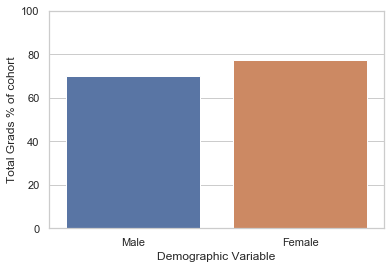

In [8]:
gender = ['Male', 'Female']

df_gender = df[df['Demographic Variable'].isin(gender)]
df_gender = df_gender[['Cohort Year', 'Cohort', 'Demographic Variable', 'Total Grads % of cohort']]

avg_by_gender = df_gender.pivot_table(values=['Total Grads % of cohort'], index=['Demographic Variable'],  aggfunc=np.mean).sort_values(by = 'Total Grads % of cohort')

print(avg_by_gender)
sns.set(style="whitegrid")

g = sns.barplot(x=avg_by_gender.index, y = 'Total Grads % of cohort', data=avg_by_gender).set_ylim(0, 100)

### Observations by Race

                      Total Grads % of cohort
Demographic Variable                         
Hispanic                            71.610837
Black                               74.595178
White                               84.448292
Asian                               86.969204


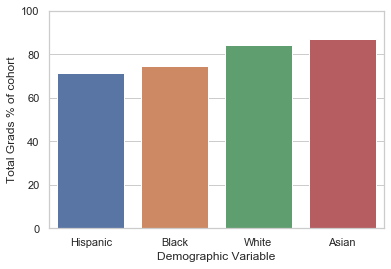

In [9]:
race = ['Asian','Black', 'Hispanic', 'White']

df_race = df[df['Demographic Variable'].isin(race)]
df_race = df_race[['Cohort Year', 'Cohort', 'Demographic Variable', 'Total Grads % of cohort']]

avg_by_race = df_race.pivot_table(values=['Total Grads % of cohort'], index=['Demographic Variable'],  aggfunc=np.mean).sort_values(by = 'Total Grads % of cohort')

print(avg_by_race)

sns.set(style="whitegrid")

g = sns.barplot(x=avg_by_race.index, y = 'Total Grads % of cohort', data=avg_by_race).set_ylim(0, 100)

### Observations by English Language Profiency

                      Total Grads % of cohort
Demographic Variable                         
ELL                                 42.033836
Not ELL                             75.800587


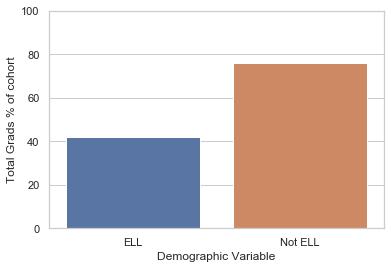

In [10]:
eng_proficiency = ['ELL','Not ELL']

df_language = df[df['Demographic Variable'].isin(eng_proficiency)]
df_language = df_language[['Cohort Year', 'Cohort', 'Demographic Variable', 'Total Grads % of cohort']]

avg_by_lang = df_language.pivot_table(values=['Total Grads % of cohort'], index=['Demographic Variable'],  aggfunc=np.mean).sort_values(by = 'Total Grads % of cohort')

print(avg_by_lang)

sns.set(style="whitegrid")

g = sns.barplot(x=avg_by_lang.index, y = 'Total Grads % of cohort', data=avg_by_lang).set_ylim(0, 100)

### Observations by Disability

                      Total Grads % of cohort
Demographic Variable                         
SWD                                 59.566819
Not SWD                             76.432135


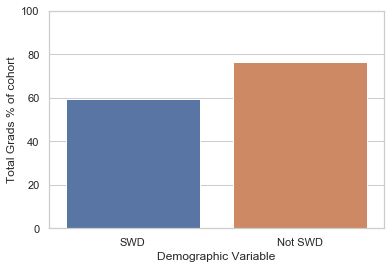

In [11]:
gender = ['SWD', 'Not SWD']

df_disability = df[df['Demographic Variable'].isin(gender)]
df_disability = df_disability[['Cohort Year', 'Cohort', 'Demographic Variable', 'Total Grads % of cohort']]

avg_by_disability = df_disability.pivot_table(values=['Total Grads % of cohort'], index=['Demographic Variable'],  aggfunc=np.mean).sort_values(by = 'Total Grads % of cohort')

print(avg_by_disability)
sns.set(style="whitegrid")

g = sns.barplot(x=avg_by_disability.index, y = 'Total Grads % of cohort', data=avg_by_disability).set_ylim(0, 100)

### Observation by Economically Disadvantaged

                      Total Grads % of cohort
Demographic Variable                         
Not Econ Disadv                     71.528255
Econ Disadv                         74.411246


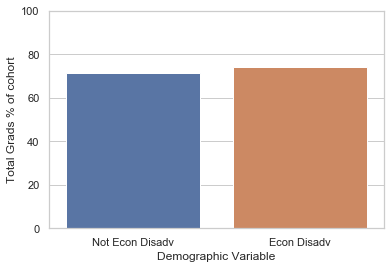

In [12]:
gender = ['Econ Disadv', 'Not Econ Disadv']

df_econ = df[df['Demographic Variable'].isin(gender)]
df_econ = df_econ[['Cohort Year', 'Cohort', 'Demographic Variable', 'Total Grads % of cohort']]

avg_by_econ = df_econ.pivot_table(values=['Total Grads % of cohort'], index=['Demographic Variable'],  aggfunc=np.mean).sort_values(by = 'Total Grads % of cohort')

print(avg_by_econ)
sns.set(style="whitegrid")

g = sns.barplot(x=avg_by_econ.index, y = 'Total Grads % of cohort', data=avg_by_econ).set_ylim(0, 100)

### Final Observations: All Demographics

                        Total Grads % of cohort
Demographic Variable                           
Current ELL                           39.373546
ELL                                   42.033836
SWD                                   59.566819
Male Native American                  63.790909
Male Hispanic                         67.941492
Male Black                            69.868328
Male                                  69.971431
Not Econ Disadv                       71.528255
Hispanic                              71.610837
Native American                       72.880000
All Students                          73.612232
Female Native American                73.656410
Econ Disadv                           74.411246
Black                                 74.595178
Never ELL                             74.759590
Female Hispanic                       75.495425
Not ELL                               75.800587
Not SWD                               76.432135
Female                                77

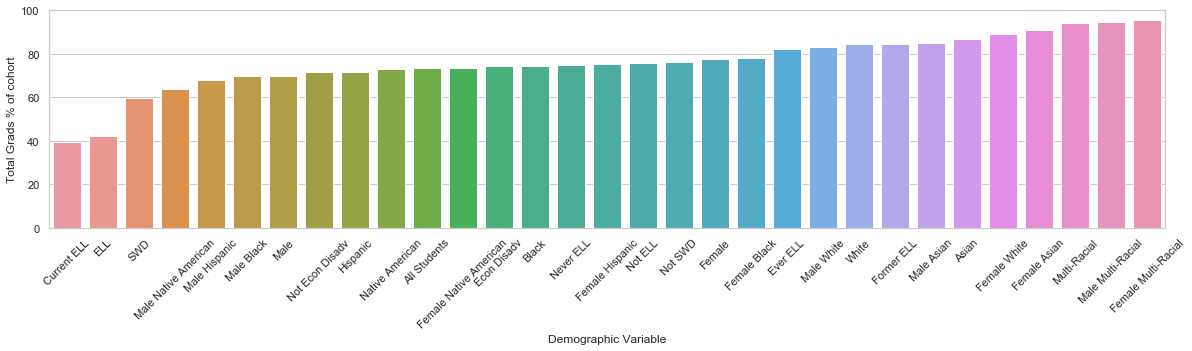

In [13]:
df_all_subsets = df[['Cohort Year', 'Cohort', 'Demographic Variable', 'Total Grads % of cohort']]

avg__all_subsets = df_all_subsets.pivot_table(values=['Total Grads % of cohort'], index=['Demographic Variable'],  aggfunc=np.mean).sort_values(by = 'Total Grads % of cohort')

print(avg__all_subsets)
sns.set(style="whitegrid")
plt.figure(figsize=(20,4))
plt.xticks(rotation=45)
g = sns.barplot(x=avg__all_subsets.index, y = 'Total Grads % of cohort', data=avg__all_subsets).set_ylim(0, 100)

### Datasource Two: Relationship PostgreSql Database - Unemployment Rate by Race (Data Source: https://catalog.data.gov/dataset/labor-force-status-by-race-and-ethnicity-beginning-2012/resource/aa0e3b52-d2ca-477b-83c0-626a6627e8f3?inner_span=True)

In [14]:
import psycopg2
import pandas as pd

# Execution Example
file_path = 'C:\\Users\\kathy\\Downloads\\Labor_Force_Status_by_Race_and_Ethnicity__Beginning_2012.csv'
table_name = 'unemployment_rates'

conn = psycopg2.connect(user = "zowglzqx",
                      password = "HinwKUQSD2t_10zuQK5Tln-us-7N9JsI",
                      host = "drona.db.elephantsql.com",
                      database = "zowglzqx")
print("Connecting to Database")
cur = conn.cursor()
f = open(file_path, "r")

#Create Table First
cur.execute("""    
DROP TABLE IF EXISTS unemployment_rates;
CREATE TABLE unemployment_rates (
Year	INTEGER,
Region	TEXT,
Total_Population_16_Years_and_Older	INTEGER,
Total_Civilian_Labor_Force	INTEGER,
Total_Unemployed	INTEGER,
Total_Unemployment_Rate	DECIMAL,
White_Alone_Population_16_Years_and_Older	INTEGER,
White_Alone_Civilian_Labor_Force	INTEGER,
White_Alone_Unemployed	INTEGER,
White_Alone_Unemployment_Rate	DECIMAL,
Black_or_African_American_Alone_Population_16_Years_and_Older	INTEGER,
Black_or_African_American_Alone_Civilian_Labor_Force	INTEGER,
Black_or_African_American_Alone_Unemployed	INTEGER,
Black_or_African_American_Alone_Unemployment_Rate	DECIMAL,
Asian_Alone_Population_16_Years_and_Older	INTEGER,
Asian_Alone_Civilian_Labor_Force	INTEGER,
Asian_Alone_Unemployed	INTEGER,
Asian_Alone_Unemployment_Rate	DECIMAL,
Hispanic_or_Latino_Population_16_Years_and_Older	INTEGER,
Hispanic_or_Latino_Civilian_Labor_Force	INTEGER,
Hispanic_or_Latino_Unemployed	INTEGER,
Hispanic_or_Latino_Unemployment_Rate	DECIMAL);
""")

cur.execute("Truncate {} Cascade;".format(table_name))
print("Truncated {}".format(table_name))
# Load table from the file with header
cur.copy_expert("copy {} from STDIN CSV HEADER QUOTE '\"'".format(table_name), f)
cur.execute("commit;")

script = "SELECT * FROM unemployment_rates"
cur.execute(script)
df_unemploy = cur.fetchall()
print("Loaded data into {}".format(table_name))
conn.close()
print("DB connection closed.")

Connecting to Database
Truncated unemployment_rates
Loaded data into unemployment_rates
DB connection closed.


In [15]:
headers = ['Year', 'Region ', 'Total Population 16 Years and Older', 'Total Civilian Labor Force', 'Total Unemployed', 'Total Unemployment Rate', 'White Alone Population 16 Years and Older', 'White Alone Civilian Labor Force', 'White Alone Unemployed', 'White Alone Unemployment Rate', 'Black or African American Alone Population 16 Years and Older', 'Black or African American Alone Civilian Labor Force', 'Black or African American Alone Unemployed', 'Black or African American Alone Unemployment Rate', 'Asian Alone Population 16 Years and Older', 'Asian Alone Civilian Labor Force', 'Asian Alone Unemployed', 'Asian Alone Unemployment Rate', 'Hispanic or Latino Population 16 Years and Older', 'Hispanic or Latino Civilian Labor Force', 'Hispanic or Latino Unemployed', 'Hispanic or Latino Unemployment Rate']
df_unemploy = pd.DataFrame(df_unemploy, columns = headers)
print(df_unemploy.head())

   Year           Region   Total Population 16 Years and Older  \
0  2018    Capital Region                               902653   
1  2018  Central New York                               635080   
2  2018      Finger Lakes                               983906   
3  2018     Hudson Valley                              1866222   
4  2018       Long Island                              2310386   

   Total Civilian Labor Force  Total Unemployed Total Unemployment Rate  \
0                      570968             28886                    5.06   
1                      383679             21164                    5.52   
2                      614359             26671                    4.34   
3                     1185852             56564                    4.77   
4                     1489263             55032                     3.7   

   White Alone Population 16 Years and Older  \
0                                     774921   
1                                     552622   
2       

In [16]:
nyc_df = df_unemploy[df_unemploy['Region '] == 'New York City']
nyc_df = nyc_df[nyc_df['Year'].between(2012, 2015)]

white_df = nyc_df[['Year', 'White Alone Unemployment Rate']]
white_df.columns = ['Year', 'Unemployment Rate']
white_df['Race'] = 'White'

black_df = nyc_df[['Year', 'Black or African American Alone Unemployment Rate']]
black_df.columns = ['Year', 'Unemployment Rate']
black_df['Race'] = 'Black'

asian_df = nyc_df[['Year', 'Asian Alone Unemployment Rate']]
asian_df.columns = ['Year', 'Unemployment Rate']
asian_df['Race'] = 'Asian'

hispanic_df = nyc_df[['Year', 'Hispanic or Latino Unemployment Rate']]
hispanic_df.columns = ['Year', 'Unemployment Rate']
hispanic_df['Race'] = 'Hispanic'

nyc_unemploy = white_df.append(black_df)

nyc_unemploy = nyc_unemploy.append(asian_df)

nyc_unemploy = nyc_unemploy.append(hispanic_df)

nyc_unemploy.reset_index(inplace = True)

nyc_unemploy.drop(columns=['index'], inplace = True)

print(nyc_unemploy)

    Year Unemployment Rate      Race
0   2015               5.5     White
1   2014                 6     White
2   2013                 7     White
3   2012               7.5     White
4   2015                11     Black
5   2014              11.5     Black
6   2013              13.6     Black
7   2012              15.5     Black
8   2015               6.4     Asian
9   2014               6.2     Asian
10  2013               7.4     Asian
11  2012               9.3     Asian
12  2015               9.1  Hispanic
13  2014               9.2  Hispanic
14  2013              12.3  Hispanic
15  2012              12.7  Hispanic


C:\Users\kathy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kathy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\kathy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [17]:
nyc_unemploy['Unemployment Rate'] = pd.to_numeric(nyc_unemploy['Unemployment Rate'], downcast="float")
nyc_unemploy['Year'] = nyc_unemploy['Year'].astype(str, copy=False)
print(nyc_unemploy.dtypes)

Year                  object
Unemployment Rate    float32
Race                  object
dtype: object


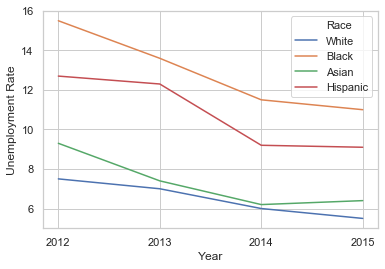

In [18]:
ax = sns.lineplot(x='Year', y='Unemployment Rate', hue = 'Race', data=nyc_unemploy)

### Combining Graduation and School Performance with Unemployment Rates

In [26]:
race = ['Asian','Black', 'Hispanic', 'White']
df_grad_emp_race = df[df['Demographic Variable'].isin(race)]

df_grad_emp_race = df_grad_emp_race[df_grad_emp_race['Cohort Year'].between(2012, 2015)]

df_grad_emp_race = df_grad_emp_race[['DBN', 'Cohort Year', 'Demographic Variable', 'Total Grads % of cohort', 'Total Regents % of cohort', 'Advanced Regents % of cohort', 'Regents w/o Advanced % of cohort', 'Local % of cohort', 'Still Enrolled % of cohort', 'Dropped Out % of cohort']]

final_df_race = df_grad_emp_race.groupby(['Cohort Year', 'Demographic Variable']).mean().reset_index()

In [36]:
nyc_unemploy['Year'] = nyc_unemploy['Year'].astype(int)
final_df_race['Cohort Year'] = final_df_race['Cohort Year'].astype(int)

merged_df = final_df_race.merge(nyc_unemploy, how='left', left_on=["Cohort Year", "Demographic Variable"], right_on=["Year","Race"])

merged_df['Employment Rate'] = 100 - merged_df['Unemployment Rate']

print(merged_df.head())

   Cohort Year Demographic Variable  Total Grads % of cohort  \
0         2012                Asian                87.915298   
1         2012                Black                75.382859   
2         2012             Hispanic                72.961462   
3         2012                White                83.223109   
4         2013                Asian                86.902906   

   Total Regents % of cohort  Advanced Regents % of cohort  \
0                  85.899888                     31.780540   
1                  67.684232                      7.882197   
2                  66.117750                      9.854390   
3                  79.212045                     22.922969   
4                  84.852972                     31.720476   

   Regents w/o Advanced % of cohort  Local % of cohort  \
0                         54.122160           2.015186   
1                         59.803561           7.700610   
2                         56.262886           6.844945   
3         

### Examine Correlation

In [23]:
cor = merged_df.corr()
cor.sort_values(by=['Employment Rate'], inplace = True, ascending=False)
employ_corr = cor['Employment Rate']
print(employ_corr)

Employment Rate                     1.000000
Advanced Regents % of cohort        0.839221
Total Regents % of cohort           0.761730
Total Grads % of cohort             0.744228
Cohort Year                         0.405411
Year                                0.405411
Still Enrolled % of cohort         -0.515279
Regents w/o Advanced % of cohort   -0.619239
Local % of cohort                  -0.784208
Dropped Out % of cohort            -0.784327
Unemployment Rate                  -1.000000
Name: Employment Rate, dtype: float64


### Observation: Taking Advanced Regents and graduating high school demonstrates a positive correlation the employment rate (whereas race has little correlation)

In [24]:
cor.sort_values(by=['Unemployment Rate'], inplace = True, ascending=False)
unemploy_corr = cor['Unemployment Rate']
print(unemploy_corr)

Unemployment Rate                   1.000000
Dropped Out % of cohort             0.784327
Local % of cohort                   0.784208
Regents w/o Advanced % of cohort    0.619239
Still Enrolled % of cohort          0.515279
Cohort Year                        -0.405411
Year                               -0.405411
Total Grads % of cohort            -0.744228
Total Regents % of cohort          -0.761730
Advanced Regents % of cohort       -0.839221
Employment Rate                    -1.000000
Name: Unemployment Rate, dtype: float64


### Observation: Inversely, dropping out of high school has a positive correlation with the unemployment rate